In [1]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Read the adatset
df_pop_est = pd.read_csv('PEA11.20231027T221019.csv')
df_pop_est.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [3]:
#checking the columns of the dataset
df_pop_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.0+ KB


In [4]:
#Checking the null values
df_pop_est.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

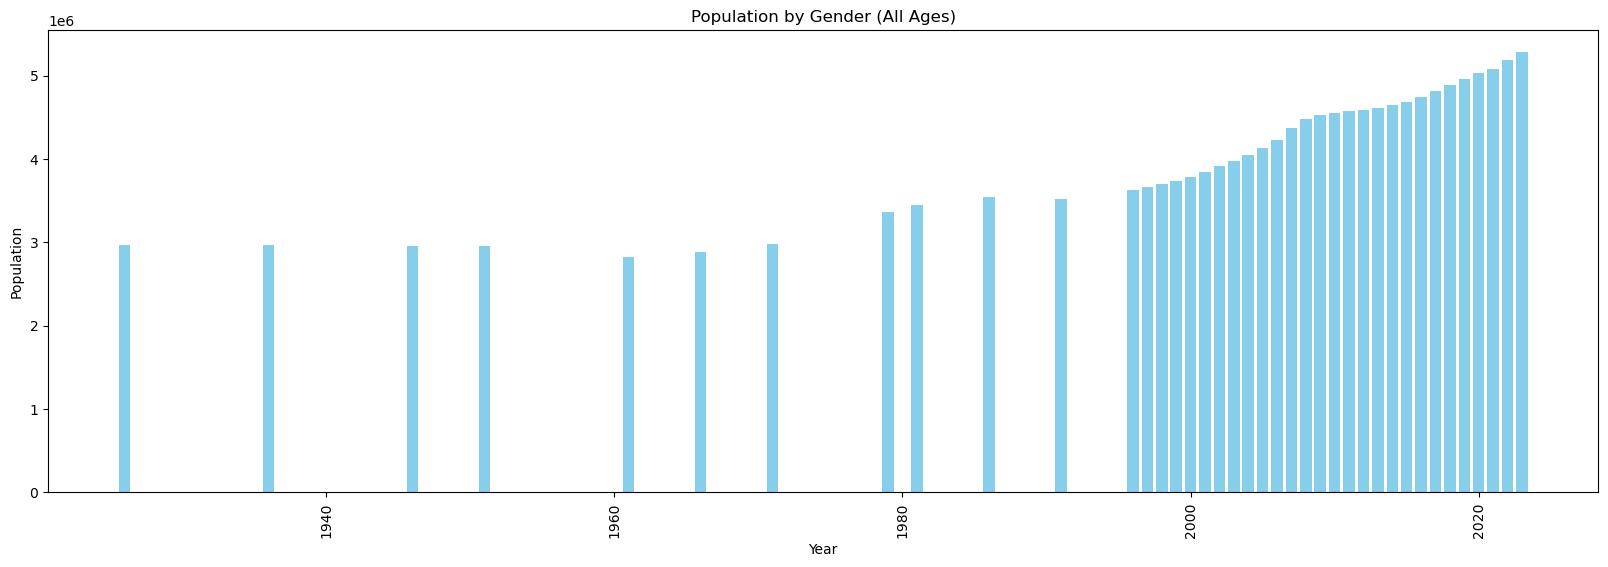

In [5]:
# Filter data for all ages and both sexes
all_ages_both_sexes = df_pop_est[(df_pop_est['Single Year of Age'] == 'All ages') & (df_pop_est['Sex'] == 'Both sexes')]

# Create a bar plot for population by gender (all ages)
plt.figure(figsize=(20, 6))
plt.bar(all_ages_both_sexes['Year'], all_ages_both_sexes['VALUE'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Gender (All Ages)')
plt.xticks(rotation=90)
plt.show()


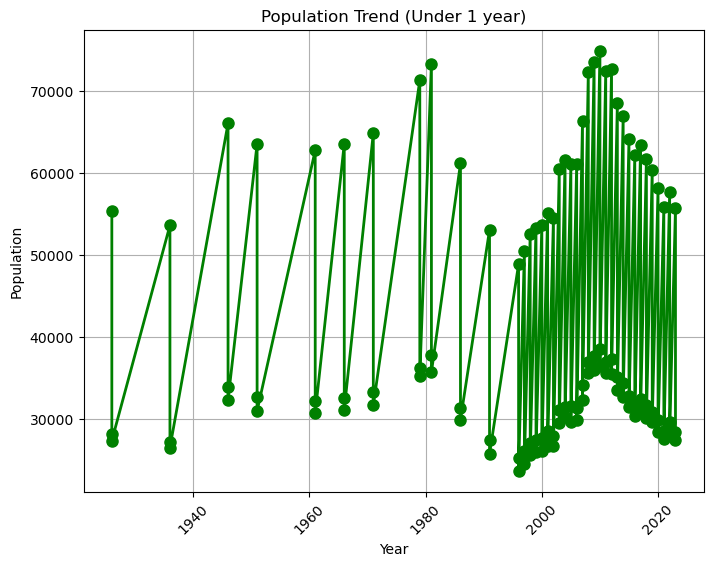

In [6]:
# Filter data for under 1 year age group
under_1_year = df_pop_est[(df_pop_est['Single Year of Age'] == 'Under 1 year')]

# Create a line plot for population trend of under 1 year age group
plt.figure(figsize=(8, 6))
plt.plot(under_1_year['Year'], under_1_year['VALUE'], marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend (Under 1 year)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_pop_est, columns=["STATISTIC Label", "Single Year of Age", "Sex", "UNIT"])

In [8]:
#first 5 rows of dataset
df_encoded.head()

,Year,VALUE,STATISTIC Label_Population estimates from 1926,Single Year of Age_1 year,Single Year of Age_10 years,Single Year of Age_11 years,Single Year of Age_12 years,Single Year of Age_13 years,Single Year of Age_14 years,Single Year of Age_15 years,...,Single Year of Age_96 years,Single Year of Age_97 years,Single Year of Age_98 years,Single Year of Age_99 years and over,Single Year of Age_All ages,Single Year of Age_Under 1 year,Sex_Both sexes,Sex_Female,Sex_Male,UNIT_Number
0,1926,2971992,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,1926,1506889,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,1926,1465103,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,1926,55391,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,1926,28084,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [9]:
# Separate dependent and independent variables
X =  df_encoded.drop(['VALUE'], axis=1)
y =  df_encoded['VALUE']

In [10]:
#Perform train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model
linear_model.fit(X_train, y_train)

# Make predictions using the trained model
linear_predictions = linear_model.predict(X_test)

# Evaluate the Linear Regression model
linear_mse = mean_squared_error(y_test, linear_predictions)
# Calculate RMSE for Linear Regression
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)

# R-squared (R2) score 
linear_r2 = r2_score(y_test, linear_predictions)

print(f'Linear Regression RMSE: {linear_rmse}')
print(f'Linear Regression R2 Score: {linear_r2}')
print(f'Linear Regression Mean Squared Error: {linear_mse}')


Linear Regression RMSE: 106549.24258529878
Linear Regression R2 Score: 0.8587042786943769
Linear Regression Mean Squared Error: 11352741095.500847


In [12]:
# Grid search parameters for Linear Regression
linear_param_grid = {
    'normalize': [True, False]
}
# Perform Grid Search for Linear Regression
linear_grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=linear_param_grid, scoring='neg_mean_squared_error', cv=5)
linear_grid_search.fit(X_train, y_train)

# Get the best Linear Regression model
best_linear_model = linear_grid_search.best_estimator_
# Evaluate the best Linear Regression model
linear_predictions = best_linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

print("Best Linear Regression Model:")
print(f'Linear Regression RMSE: {linear_rmse}')
print(f'Linear Regression R2 Score: {linear_r2}')

Best Linear Regression Model:
Linear Regression RMSE: 106549.24258529878
Linear Regression R2 Score: 0.8587042786943769


In [13]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

# Calculate RMSE for Random Forest
random_forest_rmse = mean_squared_error(y_test, predictions, squared=False)

# Calculate R-squared (R2) score for Random Forest
random_forest_r2 = r2_score(y_test, predictions)

print(f'Random Forest RMSE: {random_forest_rmse}')
print(f'Random Forest R2 Score: {random_forest_r2}')
print(f'Mean Squared Error: {mse}')

Random Forest RMSE: 6881.949160402566
Random Forest R2 Score: 0.9994105442654321
Mean Squared Error: 47361224.246365584


In [14]:
# Gridsearch for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV with the reduced parameter grid
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

#  best Random Forest model and its parameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

# Make predictions using the best Random Forest model
rf_predictions = best_rf_model.predict(X_test)

# Calculate RMSE and R2 Score 
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print("Best Random Forest Model after Hyperparameter Tuning:")
print(best_rf_model)
print("Best Random Forest Hyperparameters:")
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R2 Score: {rf_r2}')



Best Random Forest Model after Hyperparameter Tuning:
RandomForestRegressor(n_estimators=50, random_state=42)
Best Random Forest Hyperparameters:
Random Forest RMSE: 6754.9613936802325
Random Forest R2 Score: 0.9994320971873013


In [15]:
#results 
model_metrics = {
    'Model Name': ['Linear Regression', 'Random Forest'],
    'RMSE': [linear_rmse, random_forest_rmse],
    'R2 Score': [linear_r2, random_forest_r2]
}
df = pd.DataFrame(model_metrics)
print(df)

          Model Name           RMSE  R2 Score
0  Linear Regression  106549.242585  0.858704
1      Random Forest    6881.949160  0.999411


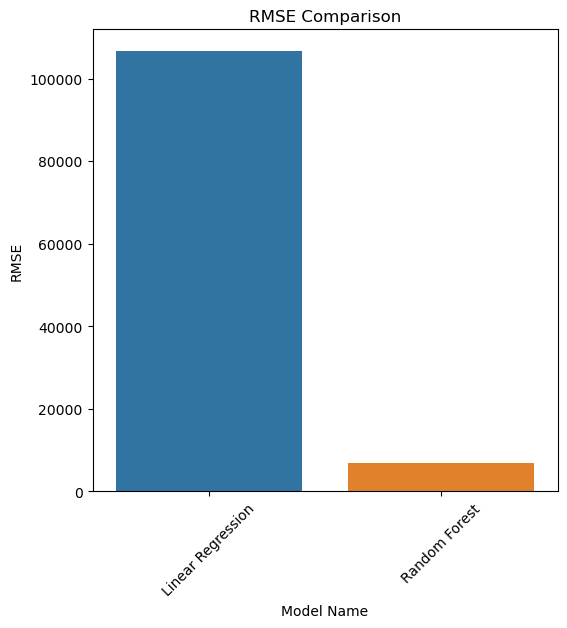

In [18]:
#plot for RMSE
plt.figure(figsize=(6, 6))
sns.barplot(x='Model Name', y='RMSE', data=df)
plt.title('RMSE Comparison')
plt.xlabel('Model Name')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


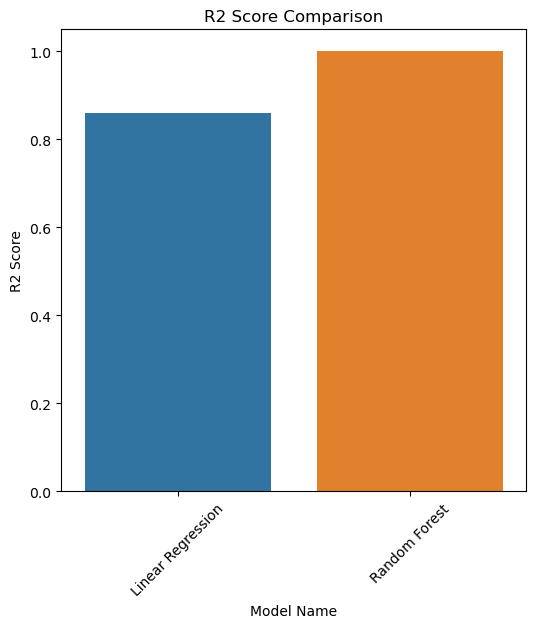

In [16]:
#plot for R2 score
plt.figure(figsize=(6, 6))
sns.barplot(x='Model Name', y='R2 Score', data=df)
plt.title('R2 Score Comparison')
plt.xlabel('Model Name')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()